# Understanding the data

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset using pandas
df = pd.read_csv(r'C:\Users\HP\Desktop\ICT DSA\Github projects\imdb_top_1000.csv')

In [3]:
#displaying first five rows
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
#number of rows and columns
df.shape

(1000, 16)

In [5]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
#description of the data
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [7]:
#name of the columns
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [8]:
#data types
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

# Data Analysis

In [9]:
#Checking if there is duplicate values
df[df.duplicated()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


No duplicated values are present

In [10]:
#null values
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Missing values are present in certificate,meta_score,gross

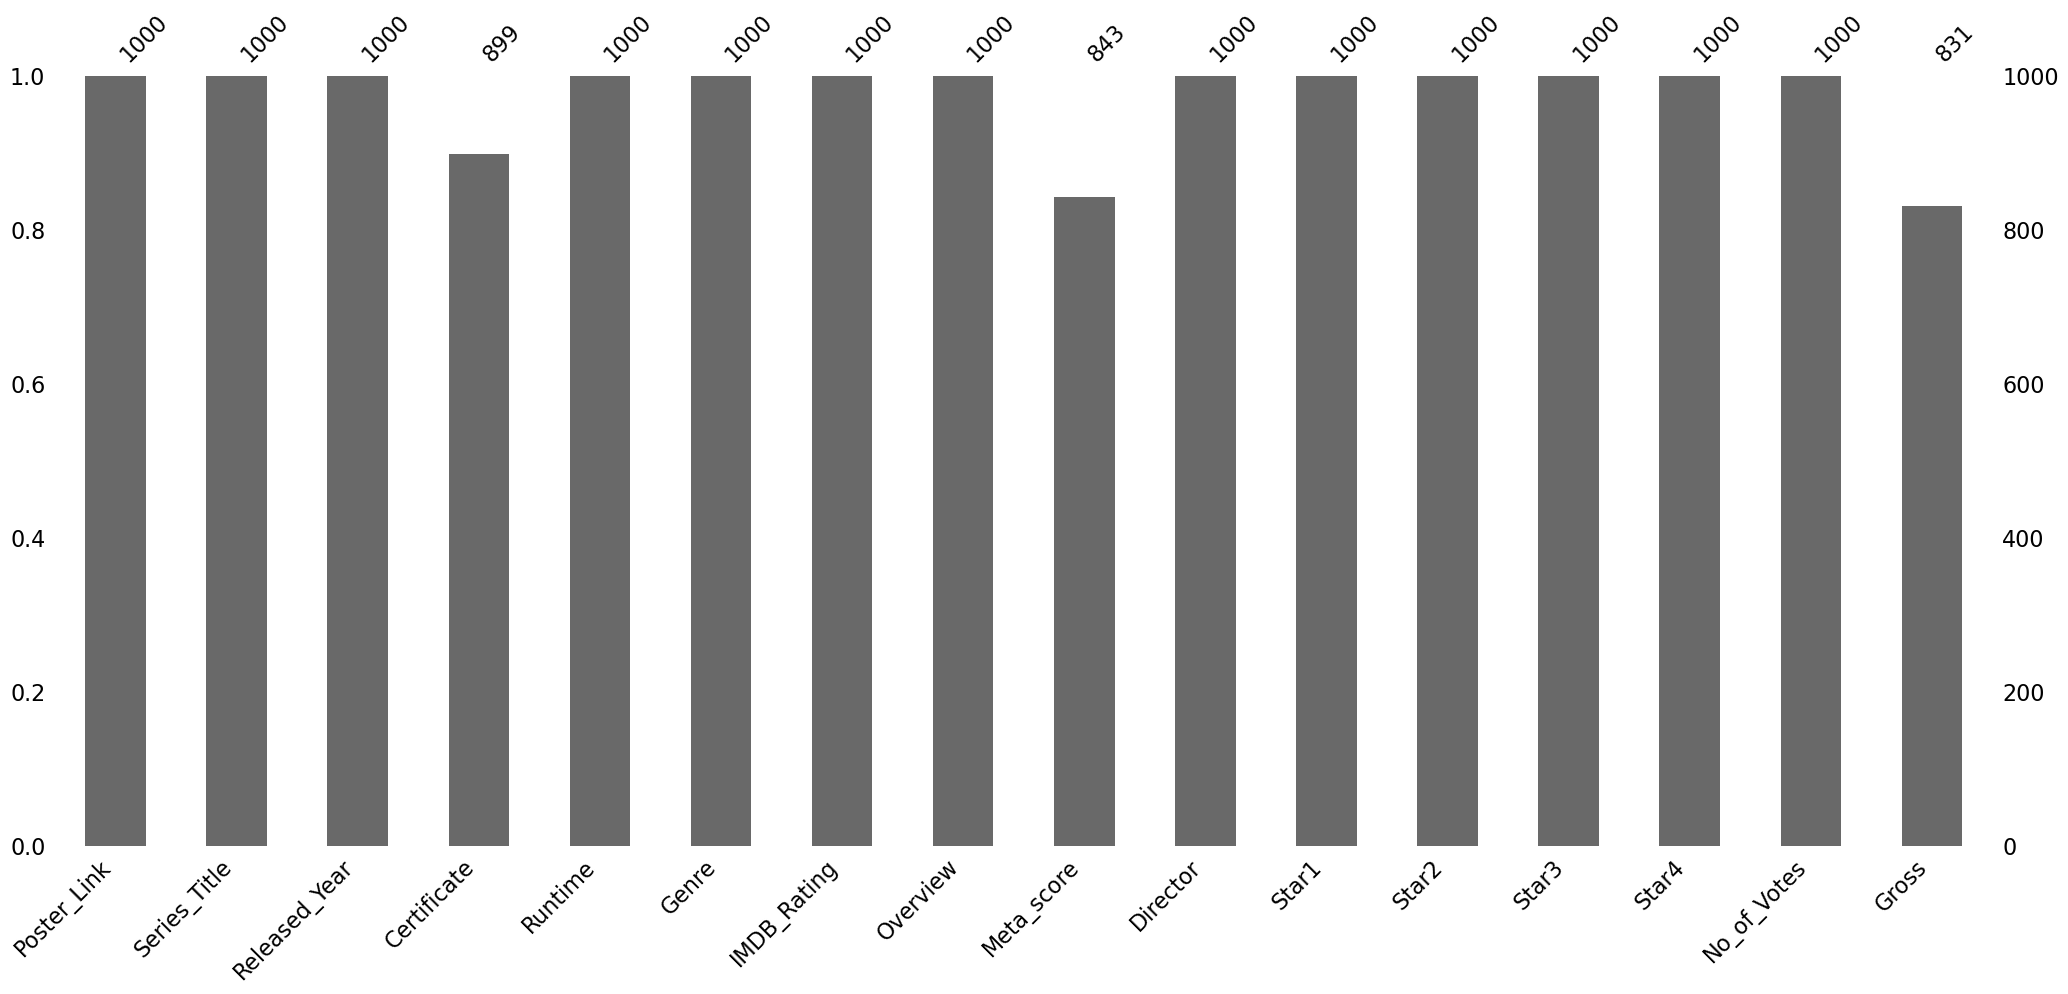

<Figure size 500x500 with 0 Axes>

In [11]:
msno.bar(df)
plt.figure(figsize =(5,5))
plt.show()

# Data Cleaning

In [12]:
df['Certificate'].fillna('U',inplace=True)

df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

In [13]:
#convert type to int to deal with it 
df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(int)

# fill null data with the avg gross
df["Gross"] = df["Gross"].replace(0,df['Gross'].mean())

In [14]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# Exploratory Data Analysis 

In [15]:
df['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [16]:
#drop row contain 'PG' to convert the column to int datatype
df = df.drop(labels=966, axis=0)

In [17]:
df['Released_Year']=df['Released_Year'].astype(int)

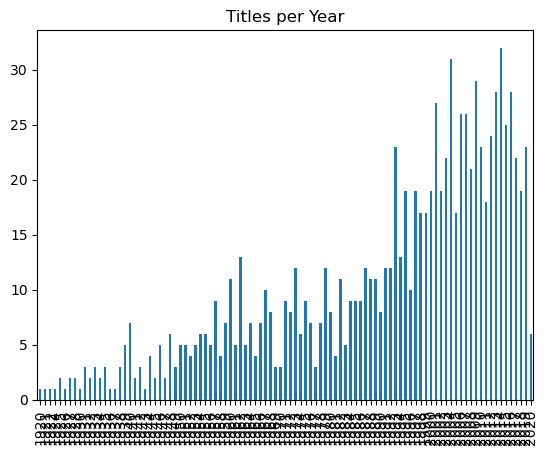

In [18]:
#Released_Year
df['Released_Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Titles per Year')
plt.show()

In [19]:
#Genre
top_rates=df.groupby('Genre').mean().sort_values('IMDB_Rating',ascending=False).head(10)
top_rates = top_rates[['IMDB_Rating']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,Genre,IMDB_Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
5,"Crime, Drama, Music",8.30
6,"Mystery, Romance, Thriller",8.30
7,"Adventure, Mystery, Thriller",8.30
8,"Drama, Fantasy, Horror",8.30
9,"Comedy, Musical, Romance",8.30


Movies whos genre 'Animation, Drama, War acieved the most rate

In [20]:
#Certificate

In [21]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

1. U = Universal; suitable for every age


2. UA = Partental Guidance; is not always appropriate for kids under the age of 12


3. A = Adult; not appropriate for children under the age of 18


4. R = Restricted; contains some adult material; Under 17 requires accompanying parent or adult guardian


5. PG-13 = Parents Strongly Cautioned; Some material may be inappropriate for children under 13.


6. PG = Parental Guidance Suggested; Some material may not be suitable for children. Parents urged to give "parental guidance".


7. G = General Audience; All ages admitted.

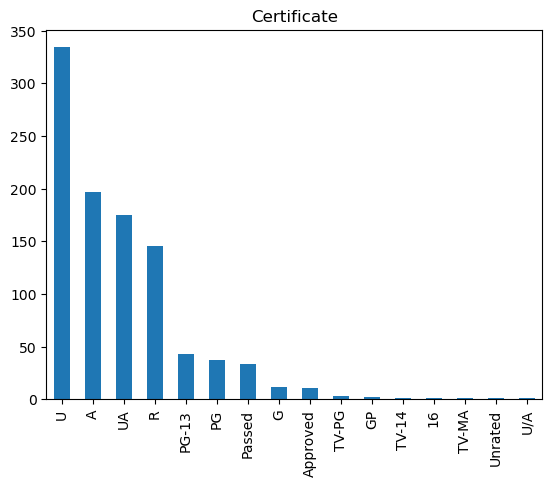

In [22]:
df['Certificate'].value_counts().plot(kind = 'bar')
plt.title('Certificate')
plt.show()

Highest number of  films is certified as Universal

In [23]:
df['Runtime'].describe()

count         999
unique        140
top       100 min
freq           23
Name: Runtime, dtype: object

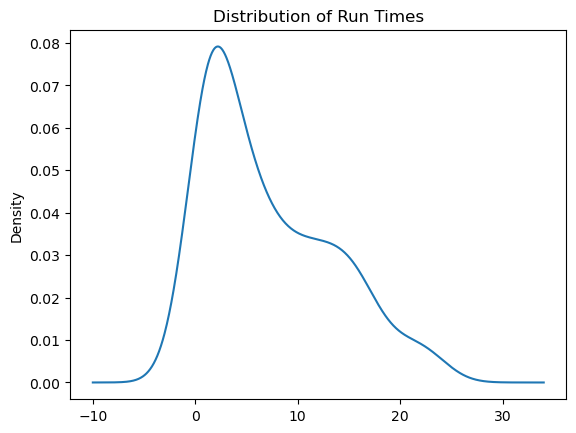

In [24]:
#Run Time
run_plt = df['Runtime'].value_counts().plot(kind='kde', title='Distribution of Run Times')

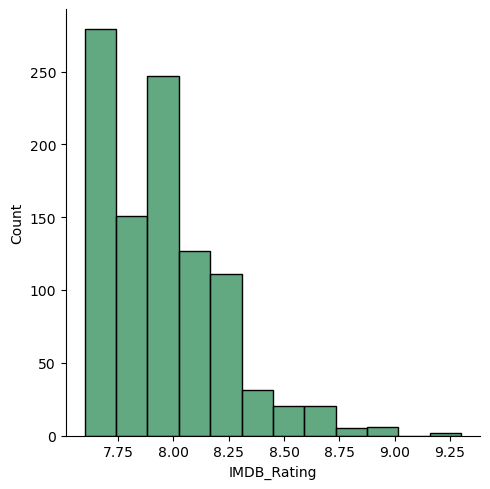

In [25]:
#imdb rating
sns.displot(df["IMDB_Rating"],bins = 12, color = "seagreen")
plt.show()

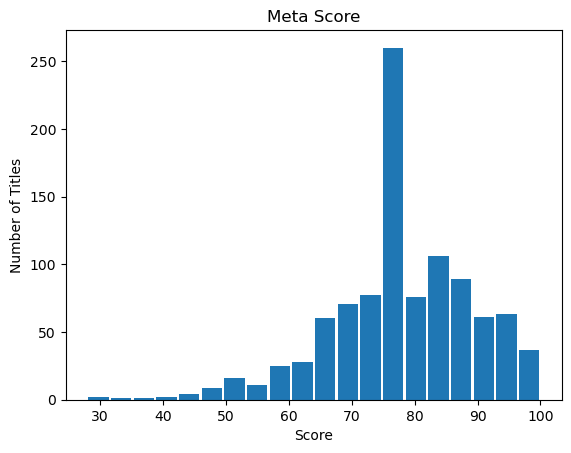

In [26]:
df['Meta_score'].plot(kind='hist',rwidth=0.9, bins=20, title='Meta Score')
plt.ylabel('Number of Titles')
plt.xlabel('Score')
plt.show()

In [27]:
#Top 25 directors:
df['Director'].value_counts().head(25)

Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
David Fincher         8
Clint Eastwood        8
Rob Reiner            7
Howard Hawks          7
Ingmar Bergman        7
Ridley Scott          6
Alfonso Cuarón        6
Charles Chaplin       6
Richard Linklater     6
Sergio Leone          6
Joel Coen             6
Wes Anderson          6
David Lynch           5
Sidney Lumet          5
Denis Villeneuve      5
Name: Director, dtype: int64

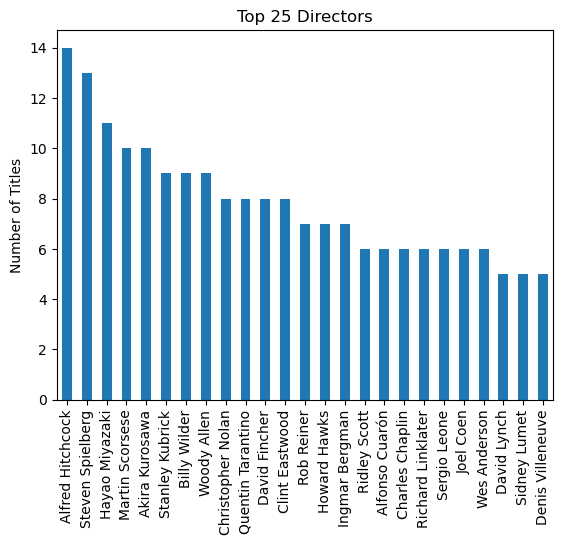

In [28]:
df['Director'].value_counts().head(25).plot(kind='bar', title='Top 25 Directors')
plt.ylabel('Number of Titles')
plt.rcParams["figure.figsize"] = (9,3)
plt.show()

<AxesSubplot:title={'center':'Distribution of Vote Numbers'}, ylabel='Frequency'>

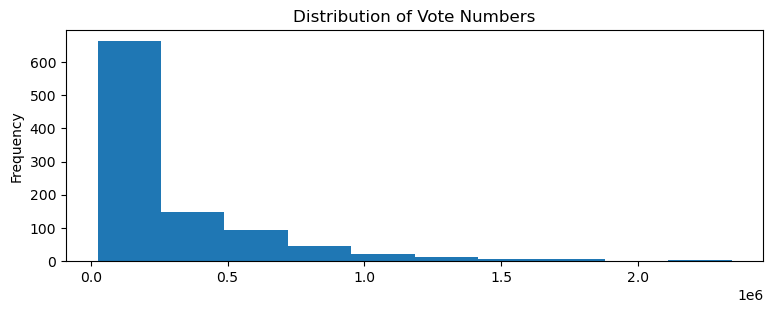

In [29]:
#No_of_Votes
df['No_of_Votes'].plot(kind='hist', bins=10, title='Distribution of Vote Numbers')

In [30]:
#Gross
df['Gross'].describe()

count    9.990000e+02
mean     6.598376e+07
std      1.001219e+08
min      1.305000e+03
25%      5.011838e+06
50%      4.234060e+07
75%      6.139004e+07
max      9.366622e+08
Name: Gross, dtype: float64

In [31]:
df['Gross'].head(10)

0     28341469.0
1    134966411.0
2    534858444.0
3     57300000.0
4      4360000.0
5    377845905.0
6    107928762.0
7     96898818.0
8    292576195.0
9     37030102.0
Name: Gross, dtype: float64

<AxesSubplot:>

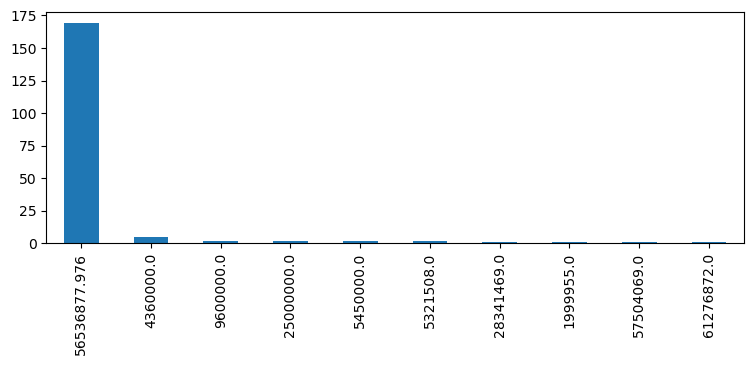

In [32]:
df['Gross'].value_counts().head(10).plot(kind='bar')

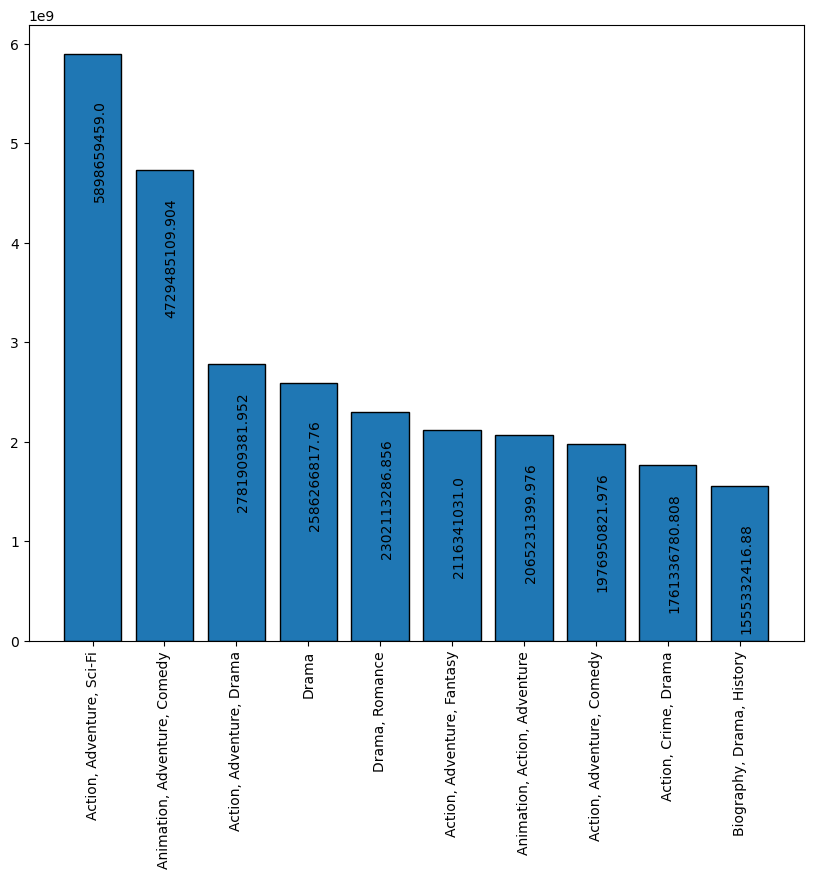

In [33]:
top_earn = df.groupby('Genre').sum().sort_values('Gross',ascending=False).head(10)
top_earn=top_earn[['Gross']]
top_earn.reset_index(inplace=True)

plt.figure(figsize=(10,8))
plt.bar(top_earn['Genre'],top_earn['Gross'],edgecolor='black')
plt.xticks(rotation='vertical')
for k,v in top_earn['Gross'].items():
    plt.text(k,v-1450000000,str(v),rotation=90)

Movies whose genre 'Action,Adventure ,Sci-Fi' achieve the most earnings

Correlation

In [34]:
 matrix = df.corr()

<AxesSubplot:>

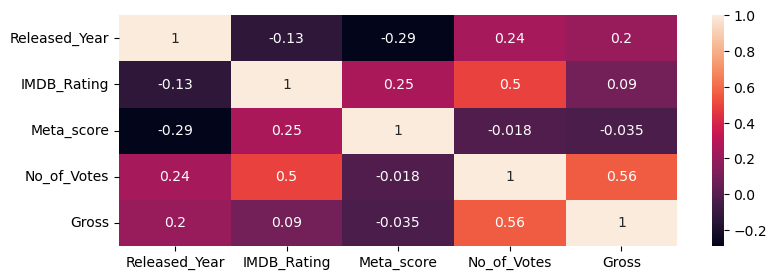

In [35]:
sns.heatmap(matrix,annot = True)

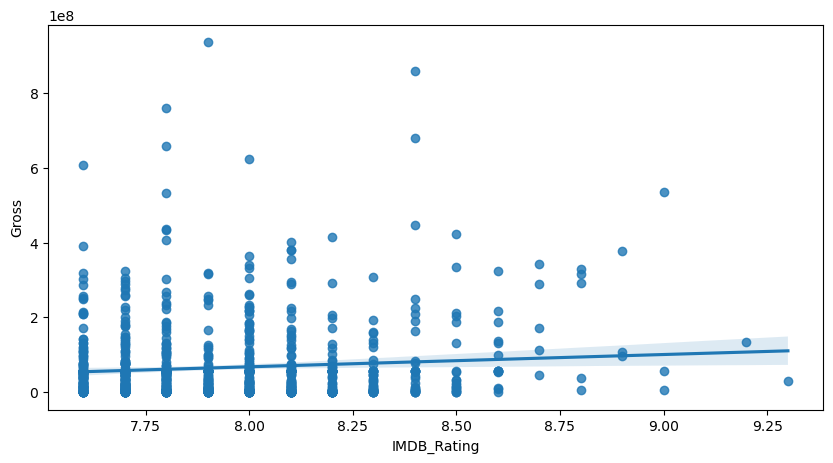

In [36]:
plt.figure(figsize=(10,5))
sns.regplot(x='IMDB_Rating',y='Gross',data=df)
plt.show()

There's a week positive relationship between IMDB rating and earnings of the movie

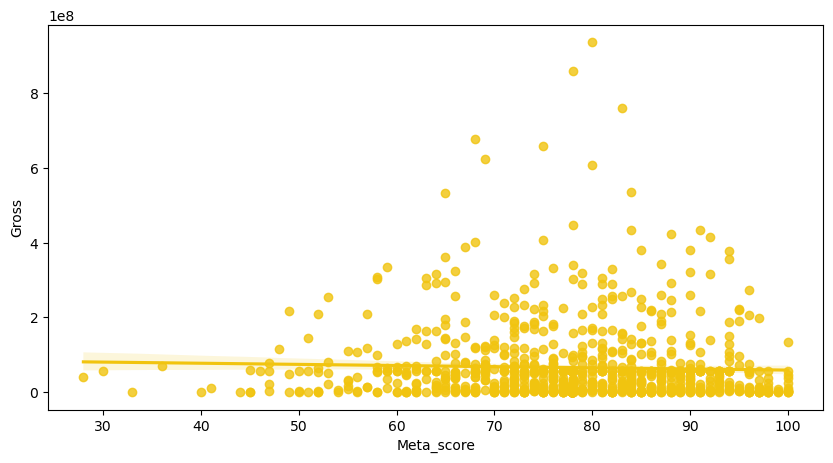

In [37]:
plt.figure(figsize=(10,5))
sns.regplot(x='Meta_score',y='Gross',data=df,color='#F1C40F')
plt.show()

Approximately the higher meta score movie gain the higher earnings